In [ ]:
!pip install nba-api
!pip install requests
!pip install seaborn
!pip install -U scikit-learn

In [19]:
from nba_api.stats.endpoints import playercareerstats
import matplotlib.pyplot as plt
from nba_api.stats.static import players
import seaborn as sns
import numpy as np

# Nikola Jokić
career = playercareerstats.PlayerCareerStats(player_id='203999') 

# pandas data frames (optional: pip install pandas)
career.get_data_frames()[0]

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,203999,2015-16,00,1610612743,DEN,21.0,80,55,1733.0,307,...,0.811,181,379,560,189,79,50,104,208,796
1,203999,2016-17,00,1610612743,DEN,22.0,73,59,2038.0,494,...,0.825,212,506,718,359,61,55,171,214,1221
2,203999,2017-18,00,1610612743,DEN,23.0,75,73,2443.0,504,...,0.850,195,608,803,458,90,61,210,212,1385
3,203999,2018-19,00,1610612743,DEN,24.0,80,80,2504.0,616,...,0.821,228,637,865,580,108,55,248,228,1604
4,203999,2019-20,00,1610612743,DEN,25.0,73,73,2335.0,565,...,0.817,166,545,711,512,85,44,226,222,1456
5,203999,2020-21,00,1610612743,DEN,26.0,72,72,2488.0,732,...,0.868,205,575,780,599,95,48,222,192,1898
6,203999,2021-22,00,1610612743,DEN,27.0,74,74,2476.0,764,...,0.810,206,813,1019,584,109,63,281,191,2004
7,203999,2022-23,00,1610612743,DEN,28.0,69,69,2323.0,646,...,0.822,167,650,817,678,87,47,247,174,1690
8,203999,2023-24,00,1610612743,DEN,29.0,79,79,2737.0,822,...,0.817,223,753,976,708,108,68,237,194,2085
9,203999,2024-25,00,1610612743,DEN,30.0,51,51,1834.0,569,...,0.821,155,492,647,521,91,33,161,110,1499


In [20]:
from nba_api.live.nba.endpoints import scoreboard

# Today's Score Board
games = scoreboard.ScoreBoard()


In [21]:
from nba_api.stats.static import players

# Find players by full name.
players.find_players_by_full_name('derrick rose')

data = players.find_players_by_full_name('Gasol')

# Get the first dictionary in the list
first_dict = data[0]
print(first_dict)

# Get the first key-value pair
id_key, id_val = list(first_dict.items())[0]

print(f"First key: {id_key}")
print(f"First value: {id_val}")

# D-Rose
career = playercareerstats.PlayerCareerStats(player_id=str(id_val)) 


# pandas data frames (optional: pip install pandas)
drose_df = career.get_data_frames()[0]

# Find players by first name.
#players.find_players_by_first_name('lebron')

# Find players by last name.
#players.find_players_by_last_name('^(james|love)$')

# Get all players.
#players.get_players()

{'id': 201188, 'full_name': 'Marc Gasol', 'first_name': 'Marc', 'last_name': 'Gasol', 'is_active': False}
First key: id
First value: 201188


In [22]:
from nba_api.stats.static import teams

# Find teams by full name.
teams.find_teams_by_full_name('cav')

# Find teams by state.
teams.find_teams_by_state('ohio')

# Find teams by city.
teams.find_teams_by_city('cleveland')

# Find teams by team nickname.
teams.find_teams_by_nickname('cav')

# Find teams by year founded.
teams.find_teams_by_year_founded(1968)

# Find teams by abbreviation.
teams.find_team_by_abbreviation('cle')

# Find teams by id.
teams.find_team_name_by_id(1610612739)

# Get all teams.
#teams.get_teams()

{'id': 1610612739,
 'full_name': 'Cleveland Cavaliers',
 'abbreviation': 'CLE',
 'nickname': 'Cavaliers',
 'city': 'Cleveland',
 'state': 'Ohio',
 'year_founded': 1970}

In [23]:
drose_df["PPG"] = drose_df["PTS"] / drose_df["GP"]
drose_df.head()

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,...,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PPG
0,201188,2008-09,00,1610612763,MEM,24.0,82,75,2521.0,350,...,201,404,605,143,63,90,164,265,975,11.890244
1,201188,2009-10,00,1610612763,MEM,25.0,69,69,2469.0,378,...,208,432,640,165,69,109,135,254,1008,14.608696
2,201188,2010-11,00,1610612763,MEM,26.0,81,81,2586.0,364,...,154,415,569,200,74,136,146,265,951,11.740741
3,201188,2011-12,00,1610612763,MEM,27.0,65,65,2370.0,357,...,120,459,579,204,62,121,121,201,952,14.646154
4,201188,2012-13,00,1610612763,MEM,28.0,80,80,2796.0,429,...,184,438,622,318,80,139,157,255,1127,14.087500


In [24]:
drose_df.columns

Index(['PLAYER_ID', 'SEASON_ID', 'LEAGUE_ID', 'TEAM_ID', 'TEAM_ABBREVIATION',
       'PLAYER_AGE', 'GP', 'GS', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A',
       'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS', 'PPG'],
      dtype='object')

In [25]:
drose_df["PLAYER_AGE"] = drose_df["PLAYER_AGE"].astype(int)
drose_df.head()

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,...,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PPG
0,201188,2008-09,00,1610612763,MEM,24,82,75,2521.0,350,...,201,404,605,143,63,90,164,265,975,11.890244
1,201188,2009-10,00,1610612763,MEM,25,69,69,2469.0,378,...,208,432,640,165,69,109,135,254,1008,14.608696
2,201188,2010-11,00,1610612763,MEM,26,81,81,2586.0,364,...,154,415,569,200,74,136,146,265,951,11.740741
3,201188,2011-12,00,1610612763,MEM,27,65,65,2370.0,357,...,120,459,579,204,62,121,121,201,952,14.646154
4,201188,2012-13,00,1610612763,MEM,28,80,80,2796.0,429,...,184,438,622,318,80,139,157,255,1127,14.087500


In [26]:
def Graphing(player_name="Derrick Rose"):
    sns.set_style('darkgrid')
    data = players.find_players_by_full_name(player_name)
    # Get the first dictionary in the list
    first_dict = data[0]

    # Get the first key-value pair
    _, id_val = list(first_dict.items())[0]
    # Get the first key-value pair
    _, name_val = list(first_dict.items())[1]
    
    career = playercareerstats.PlayerCareerStats(player_id=str(id_val)) 
    player_df = career.get_data_frames()[0]

    player_df["PPG"] = player_df["PTS"] / player_df["GP"]
    player_df["PLAYER_AGE"] = player_df["PLAYER_AGE"].astype(int)

    g = sns.relplot(x="PLAYER_AGE", y="PPG", data=player_df, hue="GS")
    g.fig.suptitle(f'{player_name}´s PPG vs AGE', fontsize=16)
    g.fig.subplots_adjust(top=0.9);

    #return player_df
    

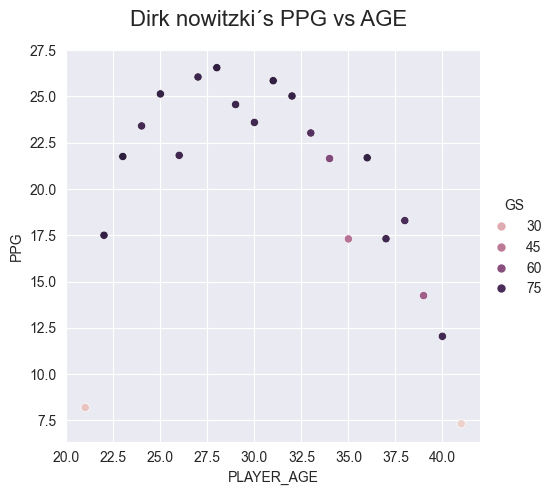

In [27]:
Graphing("Dirk nowitzki")

In [28]:
drose_df.columns

Index(['PLAYER_ID', 'SEASON_ID', 'LEAGUE_ID', 'TEAM_ID', 'TEAM_ABBREVIATION',
       'PLAYER_AGE', 'GP', 'GS', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A',
       'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS', 'PPG'],
      dtype='object')

In [29]:
drose_df[["SEASON_ID","FGA","FGM", "FG_PCT"]].head()

,SEASON_ID,FGA,FGM,FG_PCT
0,2008-09,661,350,0.530
1,2009-10,651,378,0.581
2,2010-11,691,364,0.527
3,2011-12,740,357,0.482
4,2012-13,869,429,0.494


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, '2008-09'),
  Text(1, 0, '2009-10'),
  Text(2, 0, '2010-11'),
  Text(3, 0, '2011-12'),
  Text(4, 0, '2012-13'),
  Text(5, 0, '2013-14'),
  Text(6, 0, '2014-15'),
  Text(7, 0, '2015-16'),
  Text(8, 0, '2016-17'),
  Text(9, 0, '2017-18'),
  Text(10, 0, '2018-19'),
  Text(11, 0, '2019-20'),
  Text(12, 0, '2020-21')])

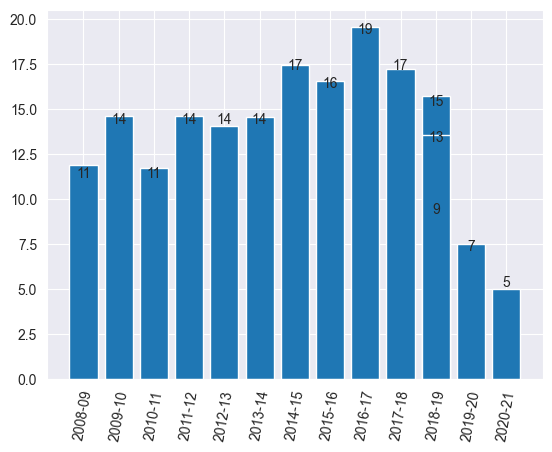

In [30]:
fig, ax = plt.subplots()

bars = ax.bar(drose_df["SEASON_ID"].values,drose_df["PPG"].values)
for bar in bars:
    yval = int(bar.get_height())
    ax.text(bar.get_x() + bar.get_width() / 2, yval, str(yval), ha='center', va='bottom')


plt.xticks(rotation=80)

In [31]:
def player_ppg(player_name):
    data = players.find_players_by_full_name(player_name)
    # Get the first dictionary in the list
    first_dict = data[0]

    # Get the first key-value pair
    _, id_val = list(first_dict.items())[0]
    # Get the first key-value pair
    _, name_val = list(first_dict.items())[1]
    
    career = playercareerstats.PlayerCareerStats(player_id=str(id_val)) 
    player_df = career.get_data_frames()[0]
    player_df["PPG"] = player_df["PTS"] / player_df["GP"]

    fig, ax = plt.subplots()

    bars = ax.bar(player_df["SEASON_ID"].values,player_df["PPG"].values)
    for bar in bars:
        yval = int(bar.get_height())
        ax.text(bar.get_x() + bar.get_width() / 2, yval, str(yval), ha='center', va='bottom')
    ax.set_xlabel("Seasons")
    ax.set_ylabel("Points per game")

    ax.set_title(f"{name_val}´s PPG during regular season")    
    
    plt.xticks(rotation=80)

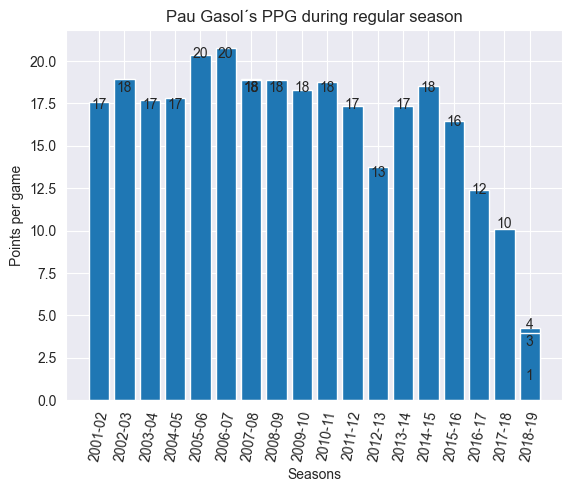

In [32]:
player_ppg("Pau Gasol")

In [33]:
def player_stats(player_name):
    data = players.find_players_by_full_name(player_name)
    # Get the first dictionary in the list
    first_dict = data[0]

    # Get the first key-value pair
    _, id_val = list(first_dict.items())[0]
    # Get the first key-value pair
    _, name_val = list(first_dict.items())[1]
    
    career = playercareerstats.PlayerCareerStats(player_id=str(id_val)) 
    player_df = career.get_data_frames()[0]
    player_df["PPG"] = player_df["PTS"] / player_df["GP"]
    player_df["APG"] = player_df["AST"] / player_df["GP"]
    player_df["RBG"] = player_df["REB"] / player_df["GP"]

    fig, ax = plt.subplots()
    # Convert string X values to positions
    x = np.arange(len(player_df["SEASON_ID"].values))  # X positions
    width = 0.5  # Width of each bar

    bars = ax.bar(x - width,player_df["PPG"].values,label='PTS per game', color='orange')
    for bar in bars:
        yval = int(bar.get_height())
        ax.text(bar.get_x() + bar.get_width() / 2, yval, str(yval), ha='center', va='bottom')
        
    ax.bar(x, player_df["APG"].values, label='AST per game', color='blue')
    ax.bar(x + width, player_df["RBG"].values, label='REB per game', color='green')
    
    ax.set_xlabel("Seasons")
    ax.set_ylabel("Points per game")
    ax.legend()
    ax.set_xticks(x)  # Set the numeric positions on the X-axis
    ax.set_xticklabels(player_df["SEASON_ID"].values)
    

    ax.set_title(f"{name_val}´s PPG during regular season")    
    
    plt.xticks(rotation=80)

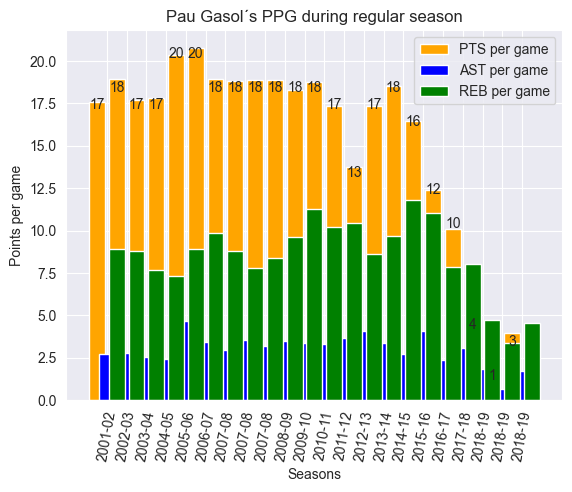

In [34]:
player_stats("Pau Gasol")

In [35]:
# Get all players.
players = players.get_players()

In [36]:
_, player_name=list(players[0].items())[1]
print(player_name)

Alaa Abdelnaby


In [37]:
player_name=[]
for player in range(len(players)):
    _, name = list(players[player].items())[1]
    player_name.append(name)
print(player_name)

['Alaa Abdelnaby', 'Zaid Abdul-Aziz', 'Kareem Abdul-Jabbar', 'Mahmoud Abdul-Rauf', 'Tariq Abdul-Wahad', 'Shareef Abdur-Rahim', 'Tom Abernethy', 'Forest Able', 'John Abramovic', 'Alex Abrines', 'Precious Achiuwa', 'Alex Acker', 'Donald Ackerman', 'Mark Acres', 'Charles Acton', 'Quincy Acy', 'Alvan Adams', 'Don Adams', 'Hassan Adams', 'Jaylen Adams', 'Jordan Adams', 'Michael Adams', 'Steven Adams', 'Rafael Addison', 'Bam Adebayo', 'Deng Adel', 'Rick Adelman', 'Jeff Adrien', 'Arron Afflalo', 'Ochai Agbaji', 'Maurice Ager', 'Mark Aguirre', 'Blake Ahearn', 'Danny Ainge', 'Alexis Ajinca', 'Henry Akin', 'Josh Akognon', 'DeVaughn Akoon-Purcell', 'Solomon Alabi', 'Mark Alarie', 'Gary Alcorn', 'Santi Aldama', 'Furkan Aldemir', 'Cole Aldrich', 'LaMarcus Aldridge', 'Chuck Aleksinas', 'Cliff Alexander', 'Cory Alexander', 'Courtney Alexander', 'Gary Alexander', 'Joe Alexander', 'Kyle Alexander', 'Trey Alexander', 'Ty-Shon Alexander', 'Victor Alexander', 'Nickeil Alexander-Walker', 'Steve Alford', 'R

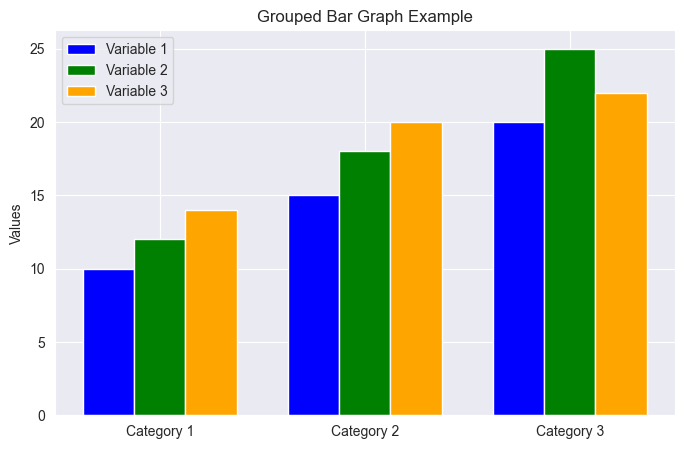

[0 1 2]


In [38]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
x = ['Category 1', 'Category 2', 'Category 3']
variable_1 = [10, 15, 20]
variable_2 = [12, 18, 25]
variable_3 = [14, 20, 22]

# X-axis positions for the categories
x_positions = np.arange(len(x))

# Bar width
bar_width = 0.25

# Create the figure and axis
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the bars for each variable
ax.bar(x_positions - bar_width, variable_1, width=bar_width, label='Variable 1', color='blue')
ax.bar(x_positions, variable_2, width=bar_width, label='Variable 2', color='green')
ax.bar(x_positions + bar_width, variable_3, width=bar_width, label='Variable 3', color='orange')

# Set the X-axis labels and title
ax.set_xticks(x_positions)
ax.set_xticklabels(x)
ax.set_title('Grouped Bar Graph Example')
ax.set_ylabel('Values')
ax.legend()

# Show the plot
plt.show()
print(x_positions)


In [39]:
# Get all players.
print(players.get_players())

AttributeError: 'list' object has no attribute 'get_players'

In [ ]:
players.find_players_by_full_name('derrick rose')

In [40]:
from nba_api.live.nba.endpoints import scoreboard
data = scoreboard.ScoreBoard()
data = data.get_dict()

In [41]:
data["scoreboard"]["games"][0]["homeTeam"]

{'teamId': 1610612765,
 'teamName': 'Pistons',
 'teamCity': 'Detroit',
 'teamTricode': 'DET',
 'wins': 31,
 'losses': 26,
 'score': 0,
 'seed': None,
 'inBonus': None,
 'timeoutsRemaining': 0,
 'periods': [{'period': 1, 'periodType': 'REGULAR', 'score': 0},
  {'period': 2, 'periodType': 'REGULAR', 'score': 0},
  {'period': 3, 'periodType': 'REGULAR', 'score': 0},
  {'period': 4, 'periodType': 'REGULAR', 'score': 0}]}

In [42]:
import pandas as pd
games = data['scoreboard']['games']


# Initialize lists to store data
game_ids = []
home_teams = []
away_teams = []
home_scores = []
home_w_l = []
away_scores = []
away_w_l = []
home_seeds = []
away_seeds = []
game_times = []

# Loop through each game and extract data
for game in games:
    game_ids.append(game['gameId'])
    home_teams.append(game['homeTeam']['teamName'])
    away_teams.append(game['awayTeam']['teamName'])
    home_scores.append(game['homeTeam']['score'])
    home_w_l.append(f"{game['homeTeam']["wins"]} - {game['homeTeam']["losses"]}")
    away_scores.append(game['awayTeam']['score'])
    away_w_l.append(f"{game['awayTeam']["wins"]} - {game['awayTeam']["losses"]}")
    home_seeds.append(game['homeTeam']['seed'])
    away_seeds.append(game['awayTeam']['seed'])
    game_times.append(game['gameStatusText'])

# Create DataFrame
df = pd.DataFrame({
    'Game ID': game_ids,
    'Home Team': home_teams,
    'Home W/L': home_w_l,
    'Away Team': away_teams,
    'Away W/L': away_w_l,
    'Home Score': home_scores,
    'Away Score': away_scores,
    'Home Seed': home_seeds,
    'Away Seed': away_seeds,
    'Game Time (ET)': game_times
})

# Display the DataFrame
df

,Game ID,Home Team,Home W/L,Away Team,Away W/L,Home Score,Away Score,Home Seed,Away Seed,Game Time (ET)
0,0022400821,Pistons,31 - 26,Clippers,31 - 25,0,0,None,None,7:00 pm ET
1,0022400822,Pacers,32 - 23,Nuggets,37 - 20,0,0,None,None,7:00 pm ET
2,0022400823,76ers,20 - 36,Bulls,22 - 35,0,0,None,None,7:00 pm ET
3,0022400824,Wizards,9 - 47,Nets,21 - 35,0,0,None,None,7:00 pm ET
4,0022400825,Hawks,26 - 31,Heat,26 - 29,0,0,None,None,7:30 pm ET
5,0022400826,Thunder,46 - 10,Timberwolves,31 - 27,0,0,None,None,8:00 pm ET
6,0022400827,Jazz,14 - 42,Trail Blazers,24 - 33,0,0,None,None,9:00 pm ET
7,0022400828,Kings,28 - 28,Hornets,14 - 41,0,0,None,None,10:00 pm ET


In [43]:
from nba_api.stats.endpoints import playbyplayv2
pbp = playbyplayv2.PlayByPlayV2('0021701171')
pbp = pbp.get_data_frames()[0]
pbp.head(5)

,GAME_ID,EVENTNUM,EVENTMSGTYPE,EVENTMSGACTIONTYPE,PERIOD,WCTIMESTRING,PCTIMESTRING,HOMEDESCRIPTION,NEUTRALDESCRIPTION,VISITORDESCRIPTION,...,PLAYER2_TEAM_NICKNAME,PLAYER2_TEAM_ABBREVIATION,PERSON3TYPE,PLAYER3_ID,PLAYER3_NAME,PLAYER3_TEAM_ID,PLAYER3_TEAM_CITY,PLAYER3_TEAM_NICKNAME,PLAYER3_TEAM_ABBREVIATION,VIDEO_AVAILABLE_FLAG
0,0021701171,2,12,0,1,8:11 PM,12:00,None,Start of 1st Period (8:11 PM EST),None,...,None,None,0,0,None,NaN,None,None,None,0
1,0021701171,4,10,0,1,8:11 PM,12:00,Jump Ball Valanciunas vs. Baynes: Tip to Anunoby,None,None,...,Celtics,BOS,4,1628384,OG Anunoby,1.610613e+09,Toronto,Raptors,TOR,1
2,0021701171,7,2,1,1,8:11 PM,11:38,MISS DeRozan 21' Jump Shot,None,None,...,None,None,0,0,None,NaN,None,None,None,1
3,0021701171,8,4,0,1,8:11 PM,11:36,None,None,Tatum REBOUND (Off:0 Def:1),...,None,None,0,0,None,NaN,None,None,None,1
4,0021701171,9,2,86,1,8:12 PM,11:21,None,None,MISS Horford 12' Turnaround Fadeaway Shot,...,None,None,0,0,None,NaN,None,None,None,1


In [44]:
from nba_api.live.nba.endpoints import boxscore
box = boxscore.BoxScore('0022000196') 
box = box.game.get_dict()

In [45]:
box.keys()

dict_keys(['gameId', 'gameTimeLocal', 'gameTimeUTC', 'gameTimeHome', 'gameTimeAway', 'gameEt', 'duration', 'gameCode', 'gameStatusText', 'gameStatus', 'regulationPeriods', 'period', 'gameClock', 'attendance', 'sellout', 'arena', 'officials', 'homeTeam', 'awayTeam'])

In [46]:
box["gameTimeLocal"]

'2021-01-17T13:00:00-05:00'

In [47]:
box["homeTeam"]["players"][1]["statistics"].keys()

dict_keys(['assists', 'blocks', 'blocksReceived', 'fieldGoalsAttempted', 'fieldGoalsMade', 'fieldGoalsPercentage', 'foulsOffensive', 'foulsDrawn', 'foulsPersonal', 'foulsTechnical', 'freeThrowsAttempted', 'freeThrowsMade', 'freeThrowsPercentage', 'minus', 'minutes', 'minutesCalculated', 'plus', 'plusMinusPoints', 'points', 'pointsFastBreak', 'pointsInThePaint', 'pointsSecondChance', 'reboundsDefensive', 'reboundsOffensive', 'reboundsTotal', 'steals', 'threePointersAttempted', 'threePointersMade', 'threePointersPercentage', 'turnovers', 'twoPointersAttempted', 'twoPointersMade', 'twoPointersPercentage'])

In [48]:
home_players = box["homeTeam"]["players"]
away_players = box["awayTeam"]["players"]

In [49]:
for player in home_players:
    print(f"{player["name"]} - {player["statistics"]["points"]}")

Jaylen Brown - 25
Grant Williams - 3
Tristan Thompson - 3
Marcus Smart - 10
Kemba Walker - 9
Jeff Teague - 0
Daniel Theis - 7
Semi Ojeleye - 4
Payton Pritchard - 3
Javonte Green - 8
Aaron Nesmith - 0
Tremont Waters - 3
Carsen Edwards - 0
Tacko Fall - 0
Romeo Langford - 0
Jayson Tatum - 0
Robert Williams III - 0


In [50]:
for player in away_players:
    print(f"{player["name"]} - {player["statistics"]["points"]}")

Reggie Bullock - 11
Julius Randle - 20
Mitchell Robinson - 8
RJ Barrett - 19
Elfrid Payton - 9
Nerlens Noel - 5
Austin Rivers - 0
Immanuel Quickley - 17
Obi Toppin - 12
Kevin Knox II - 3
Dennis Smith Jr. - 1
Theo Pinson - 0
Ignas Brazdeikis - 0
Taj Gibson - 0
Jared Harper - 0
Alec Burks - 0
Frank Ntilikina - 0


In [51]:
home_players = box["homeTeam"]["players"]
away_players = box["awayTeam"]["players"]

home_player_names = []
home_player_points = []
home_player_assists = []

away_player_names = []
away_player_points = []
away_player_assists = []

for player in home_players:
    home_player_names.append(player["name"])
    home_player_points.append(player["statistics"]["points"])
    home_player_assists.append(player["statistics"]["assists"])

for player in away_players:
    away_player_names.append(player["name"])
    away_player_points.append(player["statistics"]["points"])
    away_player_assists.append(player["statistics"]["assists"])


df = pd.DataFrame({
    'Home Player': home_player_names,
    'Home Player Points': home_player_points,
    'Home Player Assists': home_player_assists,
    'Away Player': away_player_names,
    'Away Player Points': away_player_points,
    'Away Player Assists': away_player_assists
})

df.sort_values("Home Player Points", ascending=False)

,Home Player,Home Player Points,Home Player Assists,Away Player,Away Player Points,Away Player Assists
0,Jaylen Brown,25,3,Reggie Bullock,11,0
3,Marcus Smart,10,2,RJ Barrett,19,3
4,Kemba Walker,9,4,Elfrid Payton,9,3
9,Javonte Green,8,0,Kevin Knox II,3,1
6,Daniel Theis,7,1,Austin Rivers,0,2
7,Semi Ojeleye,4,1,Immanuel Quickley,17,8
1,Grant Williams,3,1,Julius Randle,20,4
11,Tremont Waters,3,1,Theo Pinson,0,0
8,Payton Pritchard,3,0,Obi Toppin,12,0
2,Tristan Thompson,3,0,Mitchell Robinson,8,0


In [60]:
from nba_api.stats.endpoints import leaguedashteamstats

advancedGamefinder = leaguedashteamstats.LeagueDashTeamStats(
    season='2022-23'
    )

advancedGames = advancedGamefinder.get_data_frames()[0]

In [61]:
print(advancedGames)

       TEAM_ID               TEAM_NAME  GP   W   L  W_PCT     MIN   FGM   FGA  \
0   1610612737           Atlanta Hawks  82  41  41  0.500  3971.0  3658  7574   
1   1610612738          Boston Celtics  82  57  25  0.695  3996.0  3460  7278   
2   1610612751           Brooklyn Nets  82  45  37  0.549  3946.0  3399  6978   
3   1610612766       Charlotte Hornets  82  27  55  0.329  3966.0  3385  7413   
4   1610612741           Chicago Bulls  82  40  42  0.488  3981.0  3488  7116   
5   1610612739     Cleveland Cavaliers  82  51  31  0.622  3976.0  3408  6984   
6   1610612742        Dallas Mavericks  82  38  44  0.463  3986.0  3283  6909   
7   1610612743          Denver Nuggets  82  53  29  0.646  3951.0  3574  7088   
8   1610612765         Detroit Pistons  82  17  65  0.207  3961.0  3244  7140   
9   1610612744   Golden State Warriors  82  44  38  0.537  3966.0  3538  7393   
10  1610612745         Houston Rockets  82  22  60  0.268  3951.0  3329  7287   
11  1610612754          Indi